In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import numpy as np


import pandas as pd

In [10]:
aggro = pd.read_csv("aggressive.csv")
defen = pd.read_csv("defensive.csv")

In [11]:
# aggro.drop(["Unnamed: 0"], axis=1)
print aggro.head()

        Event Site        Date Round                White  \
0  Earl tourn    ?  1906.??.??     ?               Savrov   
1  Earl tourn    ?  1906.??.??     ?                Giese   
2  Earl tourn    ?  1906.??.??     ?  Alekhine, Alexander   
3  Earl tourn    ?  1906.??.??     ?  Alekhine, Alexander   
4  Earl tourn    ?  1906.??.??     ?            Manko, V.   

                 Black  Result  BlackElo  WhiteElo  ECO  Move Count  \
0  Alekhine, Alexander     0-1       NaN       NaN  C30          44   
1  Alekhine, Alexander     0-1       NaN       NaN  C47          17   
2         Ljubimov, T.  Jan-00       NaN       NaN  C58          38   
3           Romaskevic  Jan-00       NaN       NaN  C20          18   
4  Alekhine, Alexander  Jan-00       NaN       NaN  C52          35   

   Average Material Threatened  Gambit Count  Check Count  \
0                     1.840909             0            8   
1                     1.235294             0            1   
2                     1

In [12]:
print defen.head()

   Average Board Evaluation  Average Material Threatened               Black  \
0                  4.551111                     1.888889  Anand, Viswanathan   
1                  4.768966                     2.362069  Anand, Viswanathan   
2                  9.956000                     2.880000  Anand, Viswanathan   
3                  5.188000                     1.320000       Siddiqui, MA.   
4                  6.069565                     3.217391           Shah, SP.   

   BlackElo BlackTeam BlackTeamCountry  Check Count        Date  ECO  \
0       NaN       NaN              NaN           11  1981/12/??  C42   
1       NaN       NaN              NaN            0  1982/??/??  B43   
2       NaN       NaN              NaN            1  1982/??/??  E87   
3       NaN       NaN              NaN            8  1982/01/??  B06   
4       NaN       NaN              NaN            1  1983/10/??  B98   

                             Event    ...      Round SetUp        Site  \
0           

In [13]:
total = pd.concat([aggro, defen])
drops = ["Black", "BlackElo", "BlackTeam", "BlackTeamCountry", "Date", "Event", 
         "EventCategory", "EventCountry", "EventDate", "EventRounds", "EventType", "FEN", "PlyCount", "Result",
        "Round", "SetUp", "Site", "Source", "SourceDate", "White", "WhiteElo", "WhiteTeam", "WhiteTeamCountry"]
total = total.drop(drops, axis=1)

number = LabelEncoder()
total["ECO"] = number.fit_transform(total["ECO"].astype('str'))
print total.columns

Index([u'Aggressive', u'Average Board Evaluation',
       u'Average Material Threatened', u'Check Count', u'ECO', u'Gambit Count',
       u'Move Count'],
      dtype='object')


In [14]:
X = total.drop(["Aggressive"], axis=1)
print X
y = total["Aggressive"]
print y
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

       Average Board Evaluation  Average Material Threatened  Check Count  \
0                      7.381818                     1.840909            8   
1                     11.405882                     1.235294            1   
2                      8.894737                     1.815789            4   
3                      6.811111                     2.222222            1   
4                      2.788571                     1.057143            0   
5                      5.785185                     2.777778            3   
6                      7.994118                     2.264706            0   
7                      5.163636                     2.000000            0   
8                      4.066667                     0.866667            0   
9                      4.160000                     1.320000            4   
10                     4.534483                     1.206897            0   
11                     3.630435                     2.478261            0   

In [15]:
random_forest_scores = []
nmin = 1
nmax = 100
for n in range(nmin, nmax):
    forest = RandomForestClassifier(n_estimators = n)
    forest.fit(X_train, y_train)
    random_forest_scores.append(forest.score(X_test, y_test))

In [16]:
print np.argmax(random_forest_scores)
print max(random_forest_scores)

43
0.6816664441180398


43
0.6816664441180398


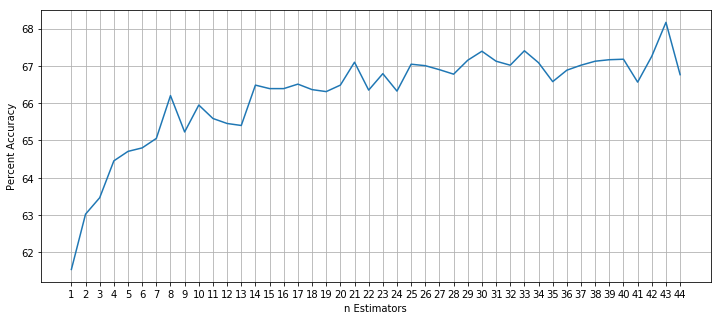

In [42]:

x = np.array([i for i in range(1, 45)])
random_forest_scores = np.array(random_forest_scores)

plt.figure(figsize=(12,5));

plt.plot(x, [r * 100 for r in [random_forest_scores[i] for i in x]]);

print np.argmax(random_forest_scores)
m = max(random_forest_scores)
print m
plt.xticks(x, [str(i) for i in x])
plt.grid(True)
plt.ylabel("Percent Accuracy")
plt.xlabel("n Estimators")
plt.show();